In [26]:
from random import random

In [32]:
# PARTIE I : on ne laisse passer qu'un seul candidat
# générer n variables aléatoires (= n secrétaires) correspondant à leurs scores,
def scores(n) : 
    return [random() for i in range(n)]
# donner le pourcentage de chance de tomber sur la meilleure secrétaire
def recrutement(n):
    succes = 0
    nb_simul = 15000
    for i in range(nb_simul) :
        secretaires = scores(n) # on génère les scores des n secrétaires
        best = secretaires.index(max(secretaires)) # on enregistre la meilleure secrétaire
        k = 1 # on choisit de laisser passer la première secrétaire
        maxi_ini = secretaires[0]
        while k < n :
            if secretaires[k] > maxi_ini : # si la secrétaire suivante a un meileur score que la première
                break # on choisit la secrétaire
            else :
                k += 1 # sinon on passse à la suivante
        if k == best : # si la secrétaire choisie correspond à la meilleure secrétaire, on a gagné
            succes += 1
    return succes / nb_simul

In [33]:
recrutement(10) # 28%

0.28373333333333334

In [34]:
# PARTIE II : on laisse passer 2 candidats
# générer n variables aléatoires (= n secrétaires) correspondant à leurs scores
def scores(n) : 
    return [random() for i in range(n)] 
# donner le pourcentage de chance de tomber sur la meilleure secrétaire
def recrut(n):
    succes = 0
    nb_simul = 15000
    for i in range(nb_simul) :
        secretaires = scores(n)
        best = secretaires.index(max(secretaires))
        k = 2 # on laisse passer les 2 premières secrétaires
        maxi_ini = max(secretaires[0], secretaires[1]) # on enregistre le meilleur score entre les 2 premières secrétaires
        while k < n :
            if secretaires[k] > maxi_ini :
                break
            else :
                k += 1
        if k == best :
            succes += 1
    return succes / nb_simul

In [35]:
recrut(10) # 36%

0.36406666666666665

In [36]:
# PARTIE III : on laisse passer k candidats
# générer n variables aléatoires (= n secrétaires) correspondant à leurs scores
def qualites(n) :
    return [random() for i in range(n)] 
# donner le pourcentage de chance de tomber sur la meilleure secrétaire
def recrutement(n, laisser_passer):
    succes = 0
    nb_simul = 15000
    for i in range(nb_simul) :
        secretaires = qualites(n)
        best = secretaires.index(max(secretaires))
        k = laisser_passer # on laisse passer les k premières secrétaires
        maxi_ini = max(secretaires[:laisser_passer]) # meilleur score des k premières secrétaires
        while k < n :
            if secretaires[k] > maxi_ini :
                break
            else :
                k += 1
        if k == best :
            succes += 1
    return succes / nb_simul

In [37]:
for k in range(1, 10) :
    print("{} : success = {}"
          .format(k,recrutement(10,k)))
# meilleure stratégie : ne pas recruter les 3 premiers candidats
# on arrive à 40% de chance d'avoir la meilleure secrétaire

1 : success = 0.2816666666666667
2 : success = 0.36866666666666664
3 : success = 0.4059333333333333
4 : success = 0.4026666666666667
5 : success = 0.371
6 : success = 0.32326666666666665
7 : success = 0.2667333333333333
8 : success = 0.18953333333333333
9 : success = 0.10153333333333334


In [13]:
def laisser(n) :
    pourcentage, r = 0, 0
    for i in range(1,n) :
        p = recrutement(n,i) # pourcentage de succès si on a laissé i candidats
        if p > pourcentage : # si ce pourcentage supérieur au pourcentage précédent
            pourcentage = p # alors la stratégie est meilleure
            r = i # il faut laisser i candidats
    return r

In [14]:
import pandas as pd
df = pd.DataFrame(columns = ["nombre de candidats", "nombre de candidats à laisser"])
df["nombre de candidats"] = [i for i in range(2,60,2)]
df["nombre de candidats à laisser"] = [laisser(i) for i in range(2,60,2)]

In [15]:
!pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\lisag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\lisag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.scatter(
    df, x='nombre de candidats', y='nombre de candidats à laisser', opacity=0.65, trendline = "ols",
    title = "Représentation graphique des simulations")
fig.show()

# coefficient de la droite : 0.355

In [21]:
# calcul théorique
# proba de succès si k candidats laissés
def recrutement(n, k) :
    return k/n * sum([1/(j-1) for j in range(k+1, n+1)])
# proba de succès pour k allant de 1 à 11
for k in range(1, 10) :
    print("{} : success = {}".format(k, recrutement(10,k)))
# on retrouve le même résultat entre calcul théorique et simulation : 3"

1 : success = 0.28289682539682537
2 : success = 0.3657936507936508
3 : success = 0.39869047619047615
4 : success = 0.3982539682539683
5 : success = 0.3728174603174603
6 : success = 0.3273809523809524
7 : success = 0.2652777777777777
8 : success = 0.18888888888888888
9 : success = 0.09999999999999999


In [22]:
import pandas as pd
n = 100
df1 = pd.DataFrame(columns = ["nombre de candidats laissés", "probabilité de succès"])
df1["nombre de candidats laissés"] = [k for k in range(1,n)]

In [23]:
df1["probabilité de succès"] = df1["nombre de candidats laissés"].apply(lambda x: recrutement(n,x))

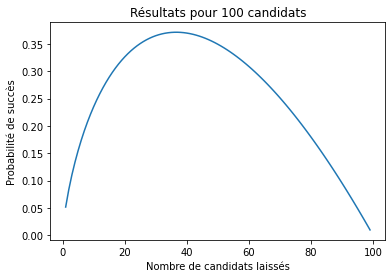

In [24]:
plt.plot(df1["nombre de candidats laissés"], df1["probabilité de succès"])
plt.title("Résultats pour 100 candidats")
plt.xlabel("Nombre de candidats laissés")
plt.ylabel("Probabilité de succès")
plt.show()

In [25]:
# plotly figure
fig = px.line(df1, x="nombre de candidats laissés", y="probabilité de succès",
title='Résultats pour 100 candidats')
fig.show()